<a href="https://colab.research.google.com/github/BonneyBoja/Bonney-s-Portfolio/blob/main/Artificial_Neural_Networks_and_TensorFlow_using_the_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from  tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential #Imports the Sequential class, which is used to build a model by stacking layers linearly.
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical #Imports a utility function to convert integer labels into one-hot encoded vectors.
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns#Imports a data visualization library, used here to create the confusion matrix heatmap.

In [ ]:
#Loading the dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


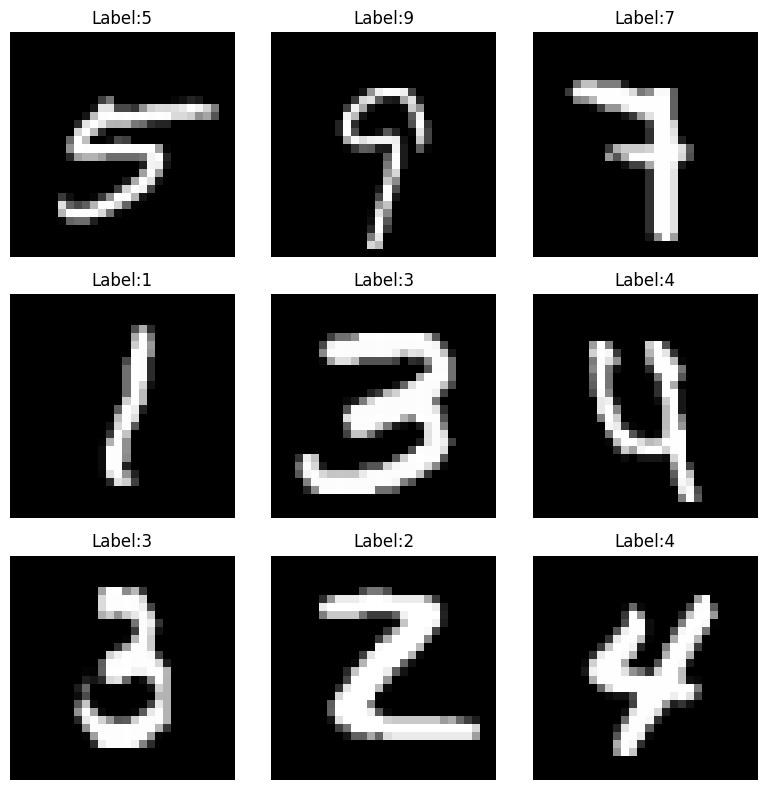

In [ ]:
#Visualing 9 random numbers
fig,axes=plt.subplots(3,3,figsize=(8,8))
axes=axes.flatten()
for i in range(9):
  #Selecting a random index
  idx=np.random.randint(0,X_train.shape[0])
  axes[i].imshow(X_train[idx],cmap='gray')
  axes[i].set_title(f"Label:{y_train[idx]}")
  axes[i].axis('off')
plt.tight_layout()
plt.show()



In [ ]:
#Data Preprocessing
#Normalization
X_train_norm=X_train.astype('float32') / 255.0
X_test_norm=X_test.astype('float32') / 255.0

In [ ]:
#One hot encoding e.ge.g., [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
num_classes=10
y_train_encoded=to_categorical(y_train,num_classes)
y_test_encoded=to_categorical(y_test,num_classes)

In [ ]:
#Verify that the shapes of the processed datasets are correct
print("Final Dataset Shapes")
print(f"X_train_norm shape:{X_train_norm.shape}")
print(f"y_train_encoded shape:{y_train_encoded.shape}")
print(f"X_test_norm shape:{X_test_norm.shape}")
print(f"y_test_encoded shape:{y_test_encoded.shape}")

Final Dataset Shapes
X_train_norm shape:(60000, 28, 28)
y_train_encoded shape:(60000, 10)
X_test_norm shape:(10000, 28, 28)
y_test_encoded shape:(10000, 10)


In [ ]:
#Building the Squential model
model=Sequential([
    #Input layer: Flattens the 28*28 image to a 784_dimentional vector
    Flatten(input_shape=(28,28),name='input_flatten'),
    #Hidden Layer1
    Dense(128, activation='relu',name='layer1'),
    Dropout(0.3,name='dropout_1'),
  #Hidden Layer 2
    Dense(64,activation='relu',name='layer2'),
    Dropout(0.3,name='dropout_2'),
    #Output layer
    Dense(num_classes,activation='softmax',name='output_softmax')
])
#print model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_flatten (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_softmax (Dense)          │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train_norm,y_train_encoded,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1 #10% of training data fro validation
                    )

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7149 - loss: 0.8979 - val_accuracy: 0.9560 - val_loss: 0.1505
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9242 - loss: 0.2633 - val_accuracy: 0.9678 - val_loss: 0.1135
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9434 - loss: 0.1926 - val_accuracy: 0.9730 - val_loss: 0.0890
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9534 - loss: 0.1635 - val_accuracy: 0.9760 - val_loss: 0.0861
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9574 - loss: 0.1419 - val_accuracy: 0.9770 - val_loss: 0.0802
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9611 - loss: 0.1302 - val_accuracy: 0.9765 - val_loss: 0.0777
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9650 - loss: 0.1160 - val_accuracy: 0.9812 - val_loss: 0.0697
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9675 - loss: 0.1048 - val_accuracy: 0.

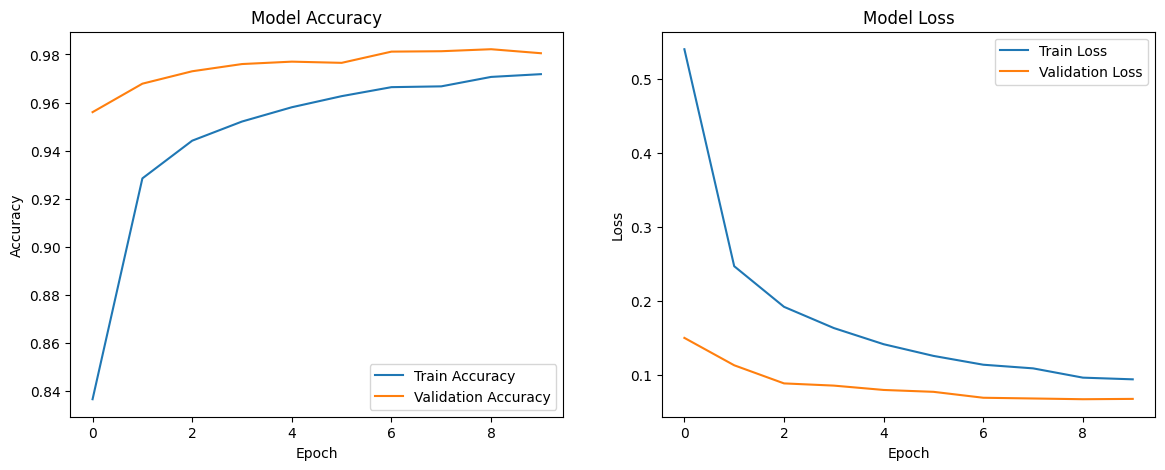

In [ ]:
# Plot training and validation accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='lower right')

# Plot training & validation loss values
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
#Evaluating the model on the test set
loss,test_accuracy=model.evaluate(X_test_norm,y_test_encoded,verbose=0)
print(f" Final Test Evaluation")
print(f"Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")

 Final Test Evaluation
Test Loss: 0.0800
Final Test Accuracy: 97.65%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


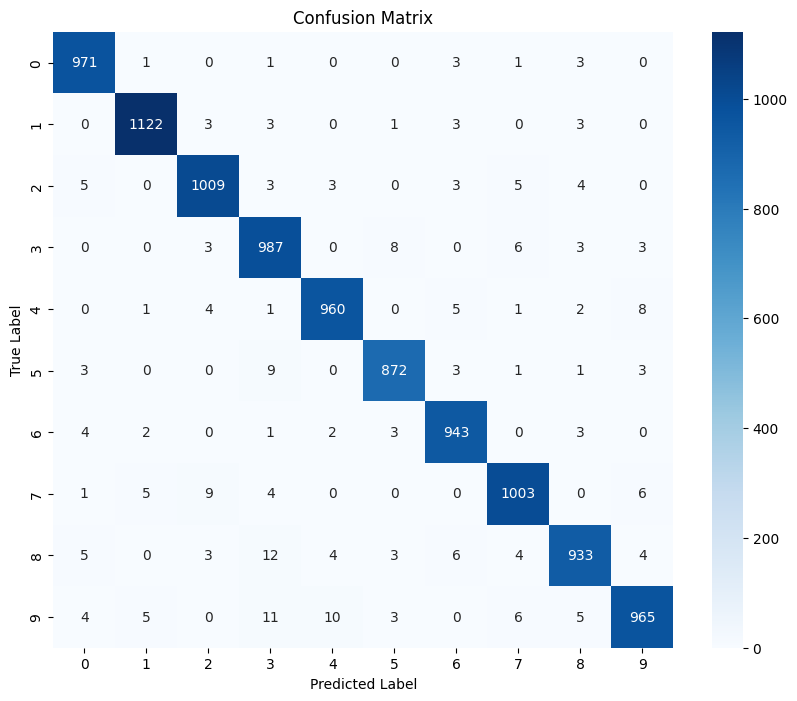

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
#GET PREDICTION (probability)
Y_predprob=model.predict(X_test_norm)
# Convert probabilities to class labels (the index of the max probability)
y_pred_labels= np.argmax(Y_predprob,axis=1)
#Generate the confusion matrix
cm=confusion_matrix(y_test,y_pred_labels)
#Display the confusion matrix using a Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=range(num_classes),yticklabels=range(num_classes))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print("Classification Report")
print(classification_report(y_test, y_pred_labels, target_names=[str(i) for i in range(num_classes)]))



In [ ]:
#Define the filename for the saved model
model_filename='mnist_model.keras'
#Save the trained model
model.save(model_filename)
print(f"Model successfully saved to:{model_filename}")

Model successfully saved to:mnist_model.keras
